In [1]:
import plotnine
from plotnine import *
#plotnine is used for visualization, ggplot
import pandas as pd

C:\Users\Christopher\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
myData=pd.read_table("Data/gapminder.txt")

#view first few lines of the dataset
print(myData.tail())

       country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [7]:
def SelectDataByCont(df,continents_list):
    """select data for continents given in the 'continents_list' from a dataframe 'df'"""    
    dataSubset=df.loc[df['continent'].isin(continents_list),:]
    return dataSubset

In [19]:
continents_list=['Americas','Africa']
dataSubset=myData.loc[myData['continent'].isin(['Africa']),:]
dataSubset.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [21]:
print(pd.unique(dataSubset['continent']))

['Africa']


In [45]:
cont_list=['Asia','Americas']
newData=SelectDataByCont(myData,cont_list)

In [46]:
newData.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [47]:
def GetMeansByCategory(df,groupby_list):
    """calculate the means of data from 'df' grouped by categories given in 'groupby_list' """   
    dataMeans=df.groupby(groupby_list, as_index=False).mean()
    return dataMeans 

In [48]:
groupBy=['continent']
MPC=GetMeansByCategory(newData,groupBy)

In [49]:
def MakeBarPlot(df):
    """ make a barplot with data from 'df' """
    p=ggplot(df) + \
        aes(x = 'continent', y = 'gdpPercap', fill='continent') + \
        geom_bar(stat='stat_identity', color="grey") + \
        xlab('Continent') + \
        ylab('GDP per capita') +\
        ggtitle('GDP per capita: a comparison')         
    return p 

p=MakeBarPlot(MPC)

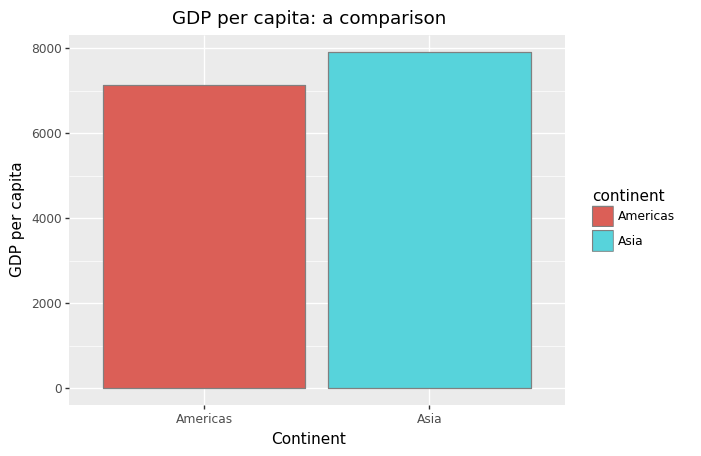

<ggplot: (13645501)>

In [50]:
p